In [1]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.3
0.6.0


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

subj_idx  block  faceList emotionRating  trial             stimulus  \
0  gc2le9xecjp1stz      0         3         angry      0  _faces/22_F_R_U.jpg   
1  gc2le9xecjp1stz      0         3         angry      1  _faces/07_M_H_L.jpg   
2  gc2le9xecjp1stz      0         3         angry      2  _faces/46_M_R_X.jpg   
3  gc2le9xecjp1stz      0         3         angry      3  _faces/47_M_S_L.jpg   
4  gc2le9xecjp1stz      0         3         angry      4  _faces/25_M_R_X.jpg   
5  gc2le9xecjp1stz      0         3         angry      5  _faces/27_F_A_U.jpg   
6  gc2le9xecjp1stz      0         3         angry      6  _faces/08_F_S_U.jpg   
7  gc2le9xecjp1stz      0         3         angry      7  _faces/38_M_H_X.jpg   
8  gc2le9xecjp1stz      0         3         angry      8  _faces/30_M_A_U.jpg   
9  gc2le9xecjp1stz      0         3         angry      9  _faces/04_F_R_U.jpg   

       face  model sex expression      mask  response        rt  faceAngry  \
0  22_F_R_U     22   F  surprised     upper         0 -4.636150          0   
1  07_M_H_L      7   M      happy     lower         0 -2.079460          0   
2  46_M_R_X     46   M  surprised  baseline         0 -1.847670          0   
3  47_M_S_L     47   M        sad     lower         0 -6.506275          0   
4  25_M_R_X     25   M  surprised  baseline         0 -1.536780          0   
5  27_F_A_U     27   F      angry     upper         1  1.906175         50   
6  08_F_S_U      8   F        sad     upper         0 -2.182530          0   
7  38_M_H_X     38   M      happy  baseline         0 -1.445230          0   
8  30_M_A_U     30   M      angry     upper         1  1.405270         50   
9  04_F_R_U      4   F  surprised     upper         0 -1.945385          0   

   faceDisgusted  faceFearful  faceHappy  faceSad  faceSurprised  
0              0            0          0        0             50  
1              0            0         50        0              0  
2              0            0          0        0            100  
3              0            0          0       50              0  
4              0            0          0        0            100  
5              0            0          0        0              0  
6              0            0          0       50              0  
7              0            0        100        0              0  
8              0            0          0        0              0  
9              0            0          0        0             50

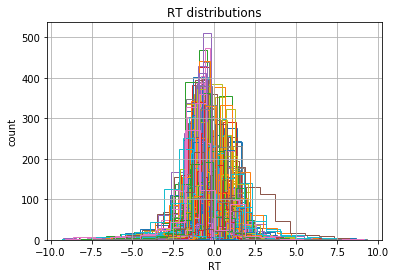

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (angry) and facial expression (disgust)
ad_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'disgusted')]
ad_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
21  gc2le9xecjp1stz      0         3         angry     23   
26  gc2le9xecjp1stz      0         3         angry     28   
27  gc2le9xecjp1stz      0         3         angry     29   
28  gc2le9xecjp1stz      0         3         angry     30   
45  gc2le9xecjp1stz      0         3         angry     47   
48  gc2le9xecjp1stz      0         3         angry     50   
49  gc2le9xecjp1stz      0         3         angry     51   
54  gc2le9xecjp1stz      0         3         angry     56   
57  gc2le9xecjp1stz      0         3         angry     59   
65  gc2le9xecjp1stz      0         3         angry     67   

               stimulus      face  model sex expression      mask  response  \
21  _faces/14_F_D_L.jpg  14_F_D_L     14   F  disgusted     lower         1   
26  _faces/71_M_D_X.jpg  71_M_D_X     71   M  disgusted  baseline         0   
27  _faces/31_F_D_L.jpg  31_F_D_L     31   F  disgusted     lower         1   
28  _faces/14_F_D_X.jpg  14_F_D_X     14   F  disgusted  baseline         1   
45  _faces/33_M_D_U.jpg  33_M_D_U     33   M  disgusted     upper         1   
48  _faces/71_M_D_U.jpg  71_M_D_U     71   M  disgusted     upper         0   
49  _faces/61_F_D_U.jpg  61_F_D_U     61   F  disgusted     upper         1   
54  _faces/71_M_D_L.jpg  71_M_D_L     71   M  disgusted     lower         1   
57  _faces/33_M_D_X.jpg  33_M_D_X     33   M  disgusted  baseline         0   
65  _faces/20_M_D_X.jpg  20_M_D_X     20   M  disgusted  baseline         1   

          rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
21  1.990945          0             50            0          0        0   
26 -2.176155          0            100            0          0        0   
27  1.718455          0             50            0          0        0   
28  2.092280          0            100            0          0        0   
45  2.713425          0             50            0          0        0   
48 -0.796970          0             50            0          0        0   
49  1.300405          0             50            0          0        0   
54  0.813410          0             50            0          0        0   
57 -0.641510          0            100            0          0        0   
65  0.964715          0            100            0          0        0   

    faceSurprised  
21              0  
26              0  
27              0  
28              0  
45              0  
48              0  
49              0  
54              0  
57              0  
65              0

In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
# none in ad_data

In [6]:
# define model
m_ad = hddm.HDDMRegressor(ad_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 32134.7 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                        mean         std        2.5q          25q          50q          75q        97.5q       mc err
a                                    1.66769   0.0359791     1.59922       1.6429       1.6671      1.69164      1.73967  0.000905167
a_std                               0.486574   0.0307889    0.429938        0.465     0.484873     0.506352     0.550682  0.000930695
a_subj.02hcv424u29nd5w               1.62293    0.241314     1.22446      1.45637      1.59503      1.76868      2.16159    0.0066725
a_subj.02k2uwlhgxnumn9               2.23856    0.229384     1.83455      2.07749      2.22324      2.38649      2.72971   0.00465487
a_subj.03g7h2hzq4o3g26               2.51644    0.340047     1.95393      2.27038      2.48505      2.72452       3.2782   0.00825246
a_subj.0nmr75cysk1ae0e                2.1336    0.224105     1.73598      1.97763      2.11956      2.27164      2.62496    0.0047886
a_subj.0t8qp67pqkw36cb               1.24996    0.148366     1

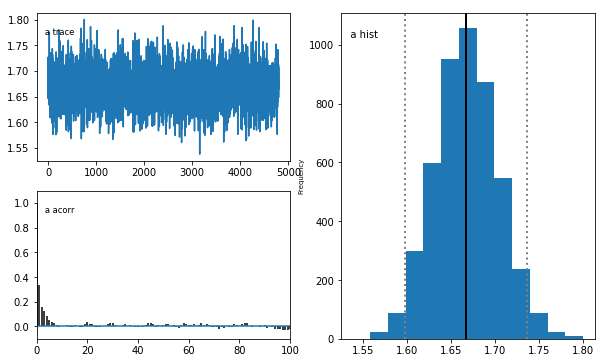

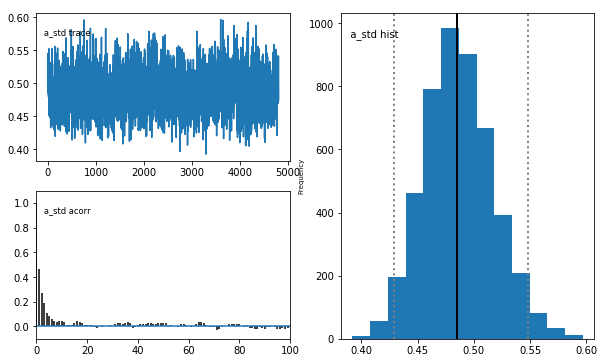

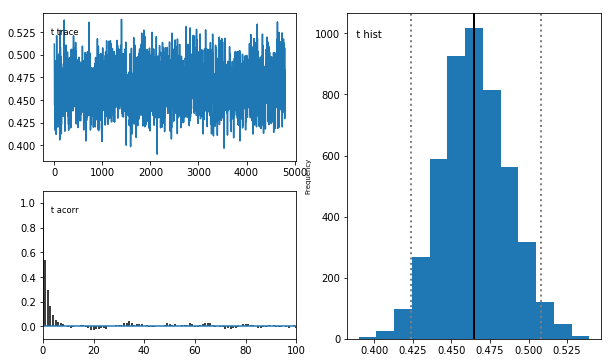

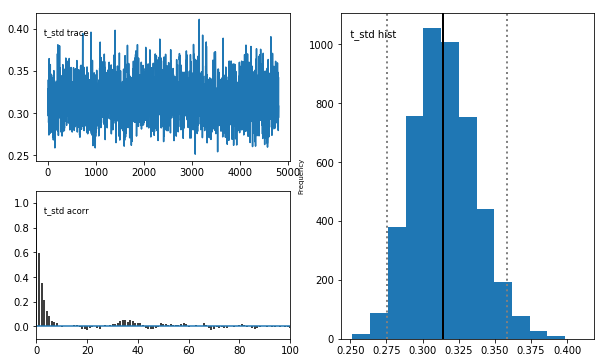

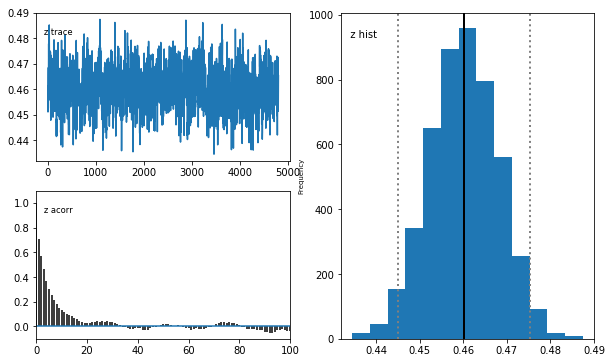

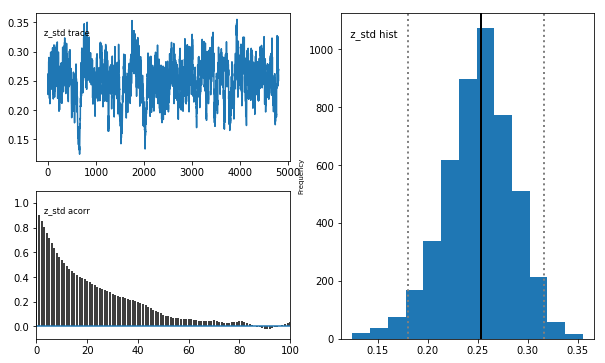

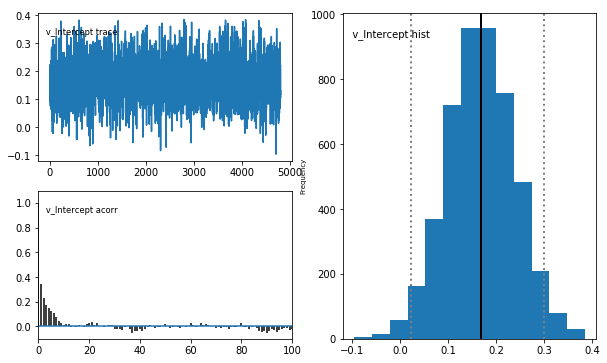

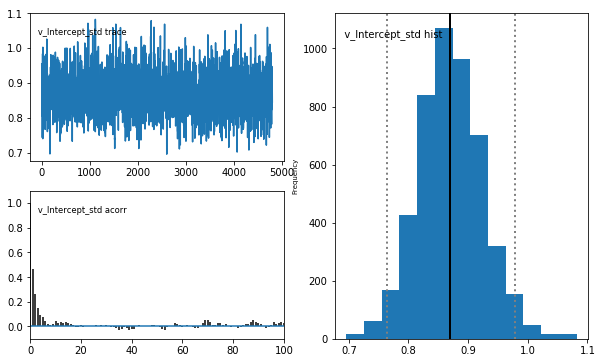

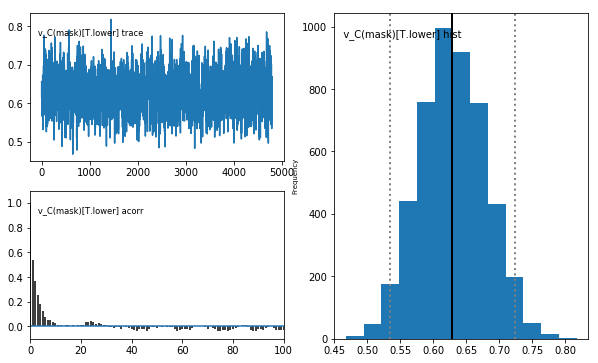

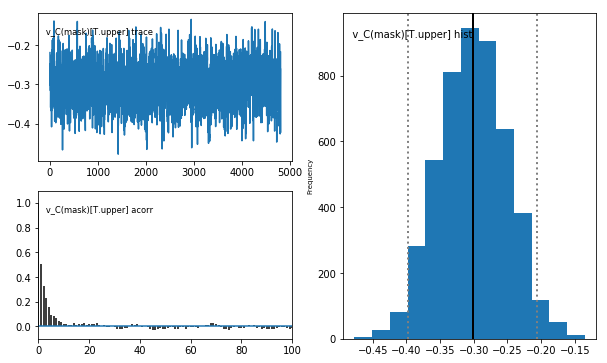

In [7]:
# run model
m_ad.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ad.print_stats()
m_ad.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std       2.5q  \
a                                   1.66769  0.0359791    1.59922   
a_std                              0.486574  0.0307889   0.429938   
a_subj.02hcv424u29nd5w              1.62293   0.241314    1.22446   
a_subj.02k2uwlhgxnumn9              2.23856   0.229384    1.83455   
a_subj.03g7h2hzq4o3g26              2.51644   0.340047    1.95393   
a_subj.0nmr75cysk1ae0e               2.1336   0.224105    1.73598   
a_subj.0t8qp67pqkw36cb              1.24996   0.148366    1.00475   
a_subj.0vfpn4uf3t031qu              1.18004   0.154577    0.91731   
a_subj.11dsfdtym1yy5mx              1.78677     0.1938    1.45267   
a_subj.1d3dadyu4ekqb4q              1.29094   0.146421    1.03431   
a_subj.1mt2emp4645cbl1              1.87587   0.270727    1.44106   
a_subj.1rst24mbtgy9rc8              1.76782   0.241415    1.37116   
a_subj.1sala6c9yc2bm1w              2.49347   0.387253    1.85703   
a_subj.1tcnxbt2pz7t2gx            

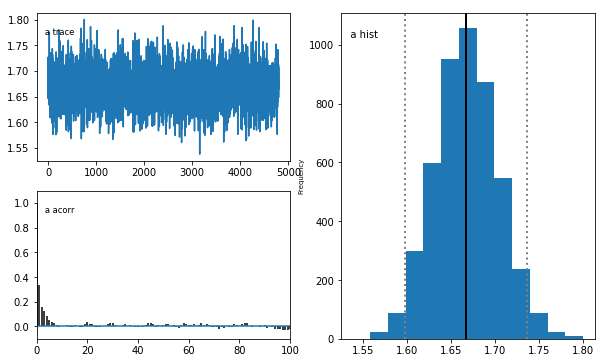

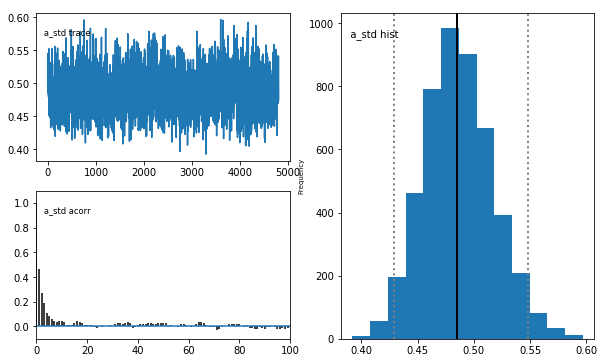

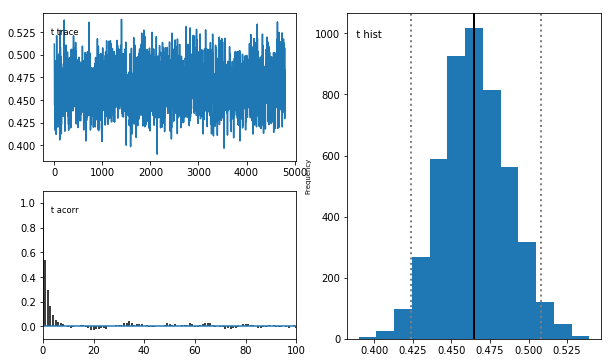

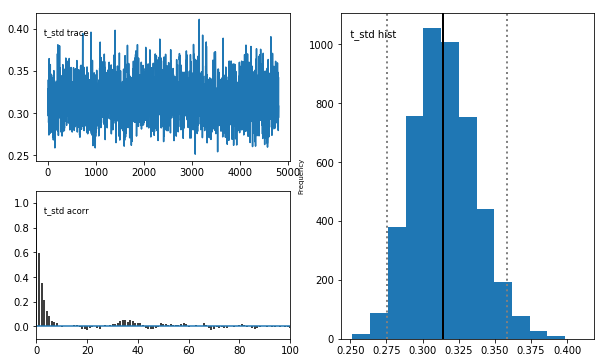

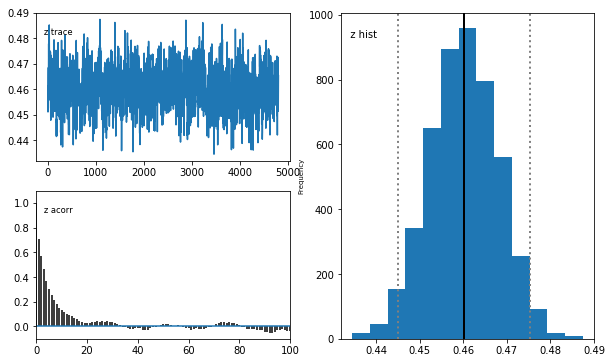

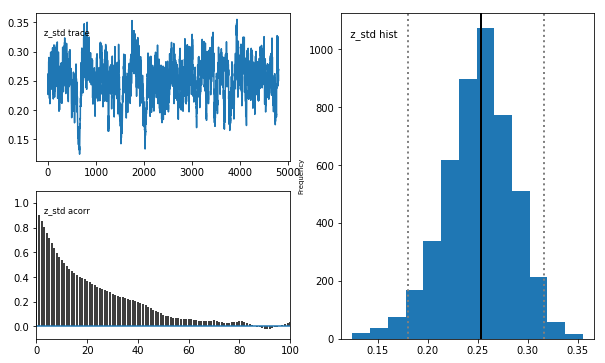

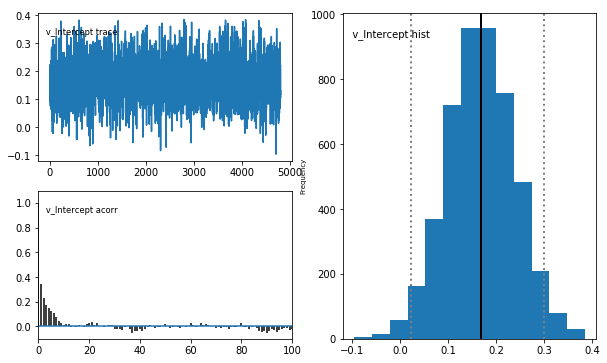

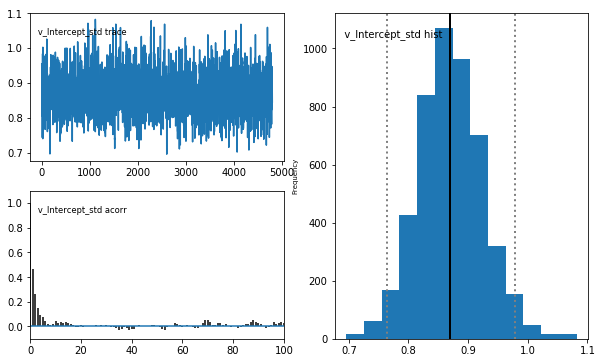

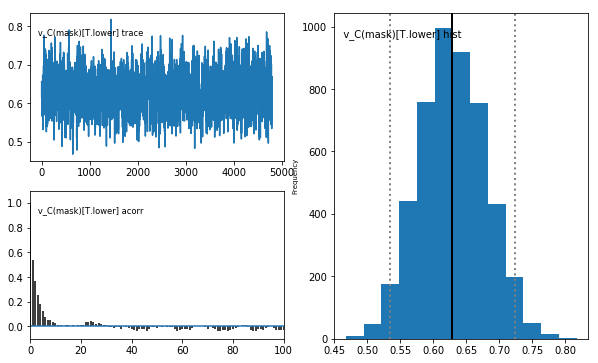

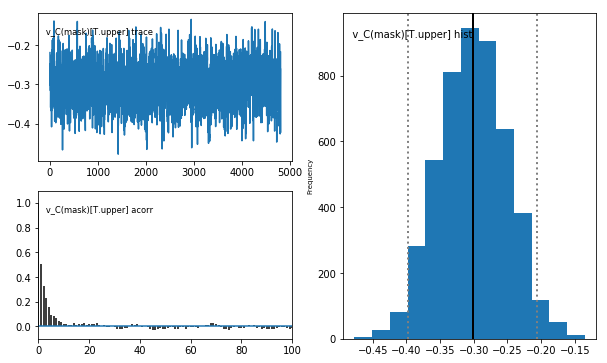

In [8]:
# save model stats
ad_stats = m_ad.gen_stats()
print(ad_stats)
ad_stats.to_csv('_maskFalsePositives/ad_5000/faceMask_hddm_faceRatings_maskFalsePositives_ad_5000.csv', index=True)

# save model posterior plots
m_ad.plot_posteriors(path='_maskFalsePositives/ad_5000/_posteriors', save=True)

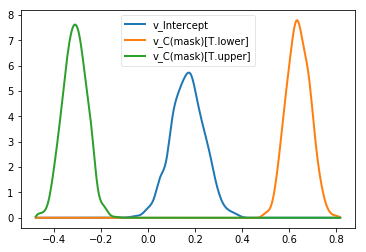

In [9]:
# plot model posteriors by mask
ad_v_none, ad_v_lower, ad_v_upper = m_ad.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ad_v_none, ad_v_lower, ad_v_upper])
plt.savefig('_maskFalsePositives/ad_5000/faceMask_hddm_faceRatings_maskFalsePositives_ad_5000_v_mask.pdf')

In [10]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ad_v_none < 0) = ", (ad_v_none.trace() < 0).mean())
print("P(ad_v_lower < 0) = ", (ad_v_lower.trace() < 0).mean())
print("P(ad_v_upper > 0) = ", (ad_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ad_v_lower < ad_v_upper) = ", (ad_v_lower.trace() < ad_v_upper.trace()).mean())

P(ad_v_none < 0) =  0.00916666666667
P(ad_v_lower < 0) =  0.0
P(ad_v_upper > 0) =  0.0
P(ad_v_lower < ad_v_upper) =  0.0


In [16]:
# subset dataset by emotion rating type (angry) and facial expression (happy)
ah_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'happy')]
ah_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
1   gc2le9xecjp1stz      0         3         angry      1   
7   gc2le9xecjp1stz      0         3         angry      7   
13  gc2le9xecjp1stz      0         3         angry     15   
14  gc2le9xecjp1stz      0         3         angry     16   
33  gc2le9xecjp1stz      0         3         angry     35   
36  gc2le9xecjp1stz      0         3         angry     38   
39  gc2le9xecjp1stz      0         3         angry     41   
42  gc2le9xecjp1stz      0         3         angry     44   
66  gc2le9xecjp1stz      0         3         angry     68   
71  gc2le9xecjp1stz      0         3         angry     73   

               stimulus      face  model sex expression      mask  response  \
1   _faces/07_M_H_L.jpg  07_M_H_L      7   M      happy     lower         0   
7   _faces/38_M_H_X.jpg  38_M_H_X     38   M      happy  baseline         0   
13  _faces/24_M_H_L.jpg  24_M_H_L     24   M      happy     lower         0   
14  _faces/02_F_H_L.jpg  02_F_H_L      2   F      happy     lower         0   
33  _faces/37_F_H_U.jpg  37_F_H_U     37   F      happy     upper         0   
36  _faces/38_M_H_L.jpg  38_M_H_L     38   M      happy     lower         0   
39  _faces/24_M_H_U.jpg  24_M_H_U     24   M      happy     upper         0   
42  _faces/18_F_H_L.jpg  18_F_H_L     18   F      happy     lower         0   
66  _faces/38_M_H_U.jpg  38_M_H_U     38   M      happy     upper         0   
71  _faces/02_F_H_X.jpg  02_F_H_X      2   F      happy  baseline         0   

          rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
1  -2.079460          0              0            0         50        0   
7  -1.445230          0              0            0        100        0   
13 -1.688045          0              0            0         50        0   
14 -1.449800          0              0            0         50        0   
33 -1.132885          0              0            0         50        0   
36 -0.922695          0              0            0         50        0   
39 -0.937185          0              0            0         50        0   
42 -3.186210          0              0            0         50        0   
66 -1.112090          0              0            0         50        0   
71 -3.131305          0              0            0        100        0   

    faceSurprised  
1               0  
7               0  
13              0  
14              0  
33              0  
36              0  
39              0  
42              0  
66              0  
71              0

In [17]:
# drop any subjects missing columns in design matrix (otherwise produces error) 
ah_data = ah_data[(ah_data.subj_idx != '7chb1ucy8l7g29z')]

In [19]:
# define model
m_ah = hddm.HDDMRegressor(ah_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 52914.1 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std        2.5q        25q        50q         75q      97.5q       mc err
a                                   2.25001   0.394417     2.07733    2.17735    2.23064     2.28799    2.39883    0.0179148
a_std                              0.886651   0.605847    0.726277   0.810804   0.859132    0.908062     1.0145    0.0259549
a_subj.02hcv424u29nd5w              2.17547   0.403298     1.53924    1.89725     2.1264     2.39338    3.10728    0.0130156
a_subj.02k2uwlhgxnumn9              2.64536    0.74208     1.48817    2.11949    2.54302     3.04713    4.44724     0.036535
a_subj.03g7h2hzq4o3g26              3.03287   0.583958     2.14831     2.6227    2.95521     3.35291    4.43589    0.0187603
a_subj.0nmr75cysk1ae0e              3.23783   0.516403     2.41031    2.87568    3.16705     3.53524    4.42843    0.0124179
a_subj.0t8qp67pqkw36cb              2.10175   0.653784     1.13784    1.61553    1.99131     2.48243    3.64395    0.0341345


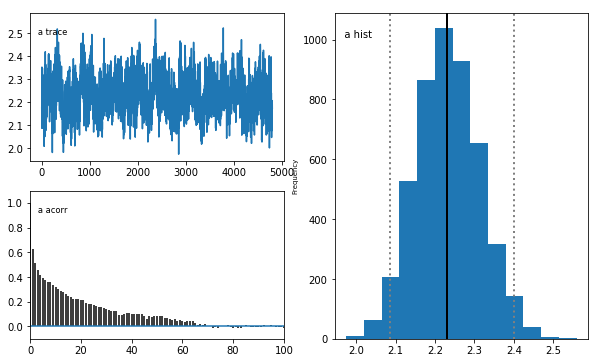

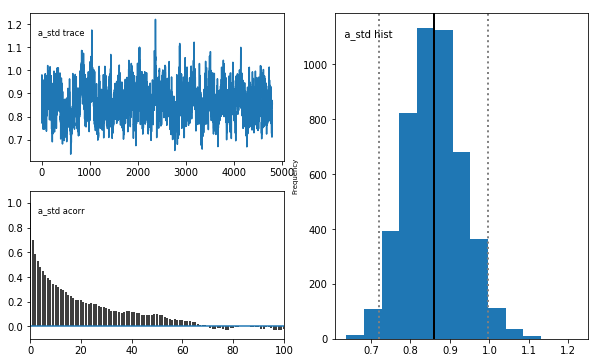

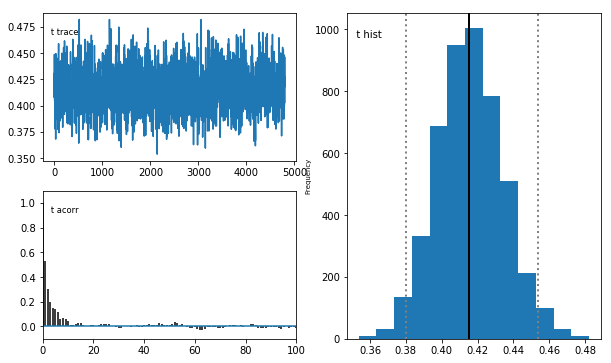

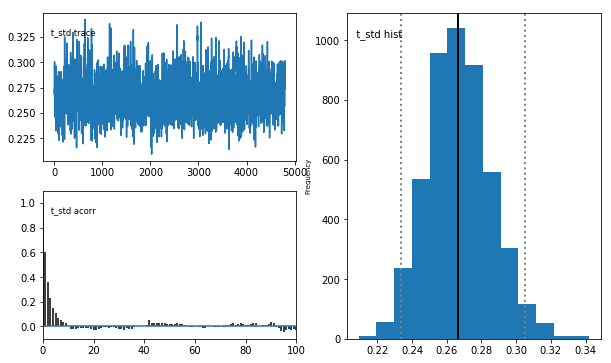

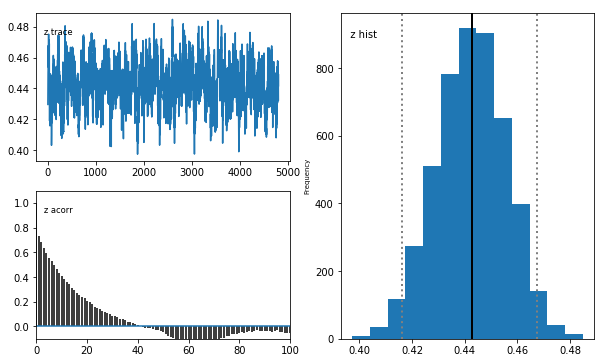

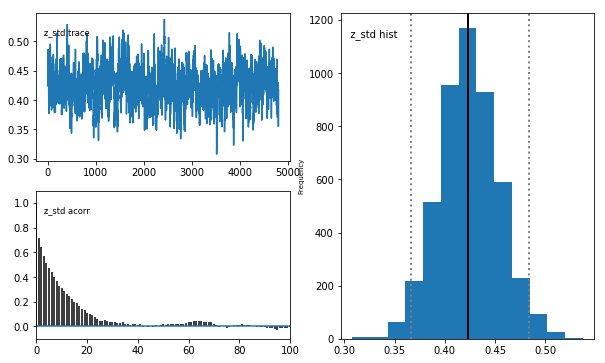

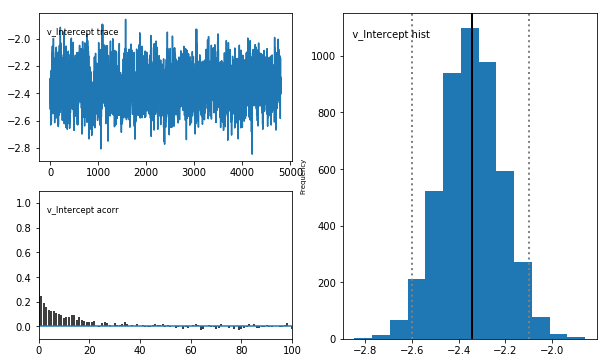

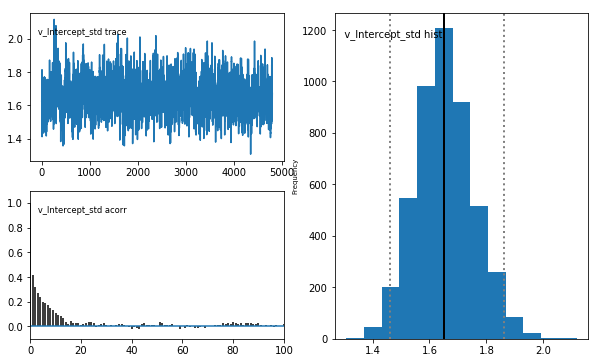

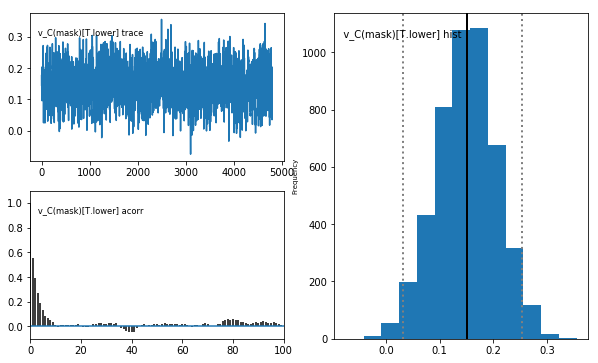

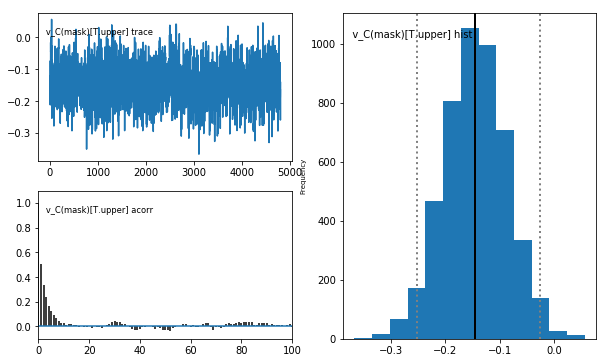

In [21]:
# run model
m_ah.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ah.print_stats()
m_ah.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std       2.5q       25q  \
a                                   2.25001   0.394417    2.07733   2.17735   
a_std                              0.886651   0.605847   0.726277  0.810804   
a_subj.02hcv424u29nd5w              2.17547   0.403298    1.53924   1.89725   
a_subj.02k2uwlhgxnumn9              2.64536    0.74208    1.48817   2.11949   
a_subj.03g7h2hzq4o3g26              3.03287   0.583958    2.14831    2.6227   
a_subj.0nmr75cysk1ae0e              3.23783   0.516403    2.41031   2.87568   
a_subj.0t8qp67pqkw36cb              2.10175   0.653784    1.13784   1.61553   
a_subj.0vfpn4uf3t031qu              2.59812   0.719781    1.47479   2.04163   
a_subj.11dsfdtym1yy5mx              2.49796   0.472944    1.77648   2.15686   
a_subj.1d3dadyu4ekqb4q              1.09401   0.158552   0.837616  0.981868   
a_subj.1mt2emp4645cbl1              2.79551   0.366301    2.17588   2.54002   
a_subj.1rst24mbtgy9rc8              2.30445    0.485

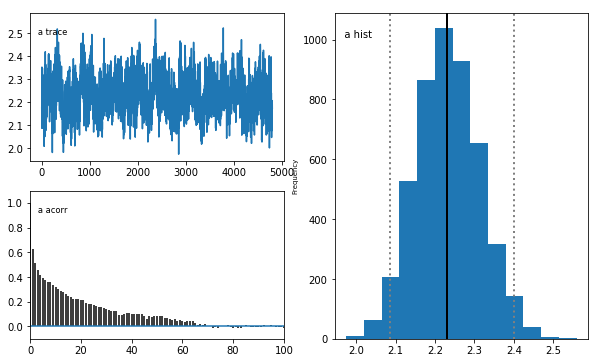

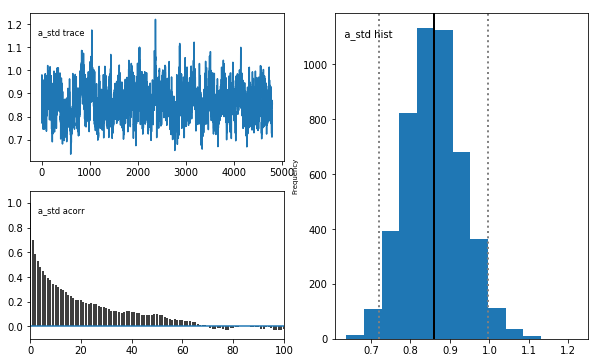

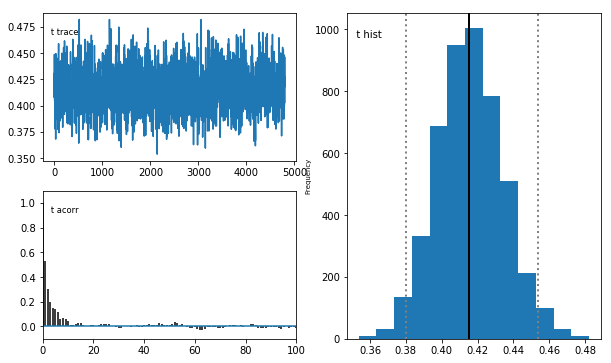

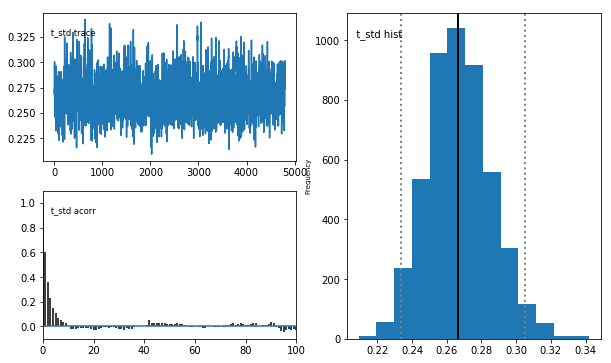

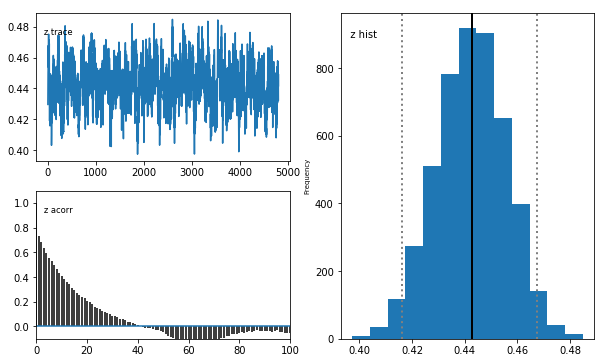

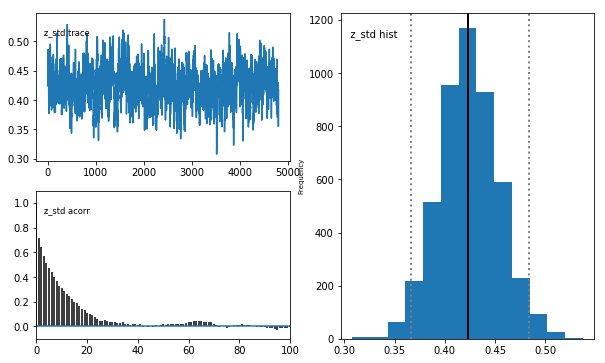

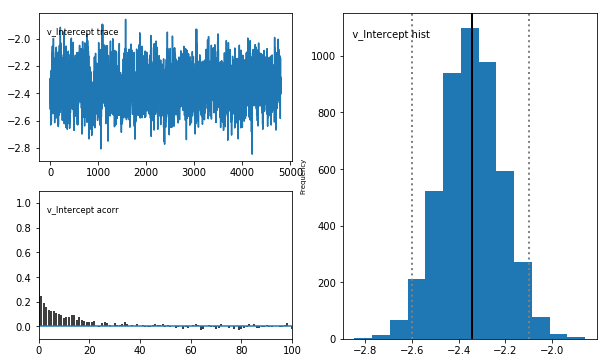

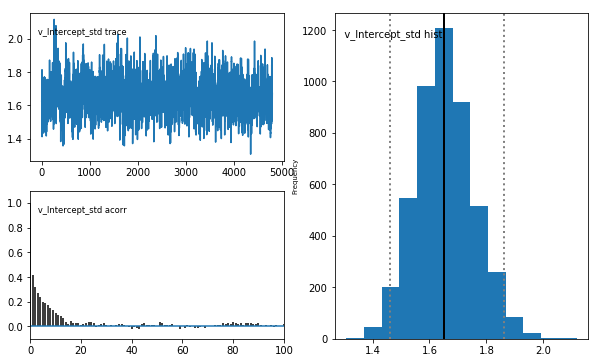

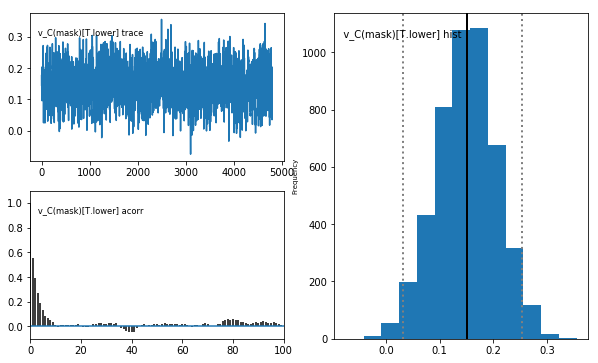

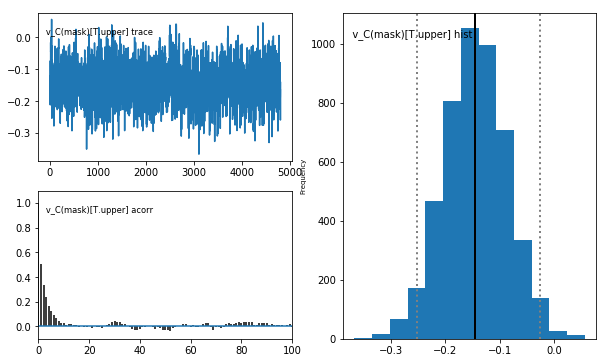

In [22]:
# save model stats
ah_stats = m_ah.gen_stats()
print(ah_stats)
ah_stats.to_csv('_maskFalsePositives/ah_5000/faceMask_hddm_faceRatings_maskFalsePositives_ah_5000.csv', index=True)

# save model posterior plots
m_ah.plot_posteriors(path='_maskFalsePositives/ah_5000/_posteriors', save=True)

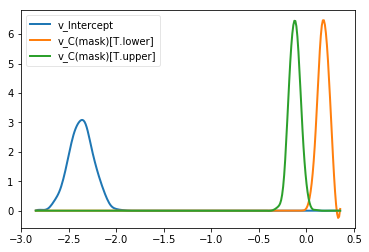

In [23]:
# plot model posteriors by mask
ah_v_none, ah_v_lower, ah_v_upper = m_ah.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ah_v_none, ah_v_lower, ah_v_upper])
plt.savefig('_maskFalsePositives/ah_5000/faceMask_hddm_faceRatings_maskFalsePositives_ah_5000_v_mask.pdf')

In [25]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ah_v_none > 0) = ", (ah_v_none.trace() > 0).mean())
print("P(ah_v_lower < 0) = ", (ah_v_lower.trace() < 0).mean())
print("P(ah_v_upper > 0) = ", (ah_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ah_v_lower < ah_v_upper) = ", (ah_v_lower.trace() < ah_v_upper.trace()).mean())

P(ah_v_none > 0) =  0.0
P(ah_v_lower < 0) =  0.00479166666667
P(ah_v_upper > 0) =  0.00625
P(ah_v_lower < ah_v_upper) =  0.0


In [4]:
# subset dataset by emotion rating type (angry) and facial expression (surprised)
ar_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'surprised')]
ar_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
0   gc2le9xecjp1stz      0         3         angry      0   
2   gc2le9xecjp1stz      0         3         angry      2   
4   gc2le9xecjp1stz      0         3         angry      4   
9   gc2le9xecjp1stz      0         3         angry      9   
31  gc2le9xecjp1stz      0         3         angry     33   
34  gc2le9xecjp1stz      0         3         angry     36   
44  gc2le9xecjp1stz      0         3         angry     46   
47  gc2le9xecjp1stz      0         3         angry     49   
53  gc2le9xecjp1stz      0         3         angry     55   
56  gc2le9xecjp1stz      0         3         angry     58   

               stimulus      face  model sex expression      mask  response  \
0   _faces/22_F_R_U.jpg  22_F_R_U     22   F  surprised     upper         0   
2   _faces/46_M_R_X.jpg  46_M_R_X     46   M  surprised  baseline         0   
4   _faces/25_M_R_X.jpg  25_M_R_X     25   M  surprised  baseline         0   
9   _faces/04_F_R_U.jpg  04_F_R_U      4   F  surprised     upper         0   
31  _faces/56_F_R_U.jpg  56_F_R_U     56   F  surprised     upper         0   
34  _faces/22_F_R_L.jpg  22_F_R_L     22   F  surprised     lower         0   
44  _faces/09_M_R_L.jpg  09_M_R_L      9   M  surprised     lower         0   
47  _faces/04_F_R_X.jpg  04_F_R_X      4   F  surprised  baseline         1   
53  _faces/46_M_R_U.jpg  46_M_R_U     46   M  surprised     upper         0   
56  _faces/56_F_R_X.jpg  56_F_R_X     56   F  surprised  baseline         1   

          rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
0  -4.636150          0              0            0          0        0   
2  -1.847670          0              0            0          0        0   
4  -1.536780          0              0            0          0        0   
9  -1.945385          0              0            0          0        0   
31 -0.846765          0              0            0          0        0   
34 -1.111325          0              0            0          0        0   
44 -4.187010          0              0            0          0        0   
47  2.915830          0              0            0          0        0   
53 -0.987080          0              0            0          0        0   
56  0.851640          0              0            0          0        0   

    faceSurprised  
0              50  
2             100  
4             100  
9              50  
31             50  
34             50  
44             50  
47            100  
53             50  
56            100

In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error) 
ar_data = ar_data[(ar_data.subj_idx != 'ygpcur698h4dcw5')]

In [6]:
# define model
m_ar = hddm.HDDMRegressor(ar_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 51183.1 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std        2.5q        25q        50q        75q       97.5q       mc err
a                                   2.13148  0.0654868     2.00617    2.08749    2.13091    2.17463      2.2624   0.00303611
a_std                               0.71623  0.0575033    0.609362   0.675726   0.714052   0.753762    0.834408   0.00284234
a_subj.02hcv424u29nd5w              2.85851   0.346095     2.25631    2.61385    2.83456    3.07831     3.60063   0.00916201
a_subj.02k2uwlhgxnumn9              2.33439   0.551878     1.43783    1.93873    2.26666    2.66479     3.55405    0.0212557
a_subj.03g7h2hzq4o3g26              2.85968    0.43141     2.15139    2.54572    2.81612    3.11201     3.82704    0.0113631
a_subj.0nmr75cysk1ae0e               1.8053   0.219225     1.44532    1.64789    1.78085    1.93639     2.30636   0.00461383
a_subj.0t8qp67pqkw36cb              1.97892    0.44143     1.29692    1.65869    1.91932    2.23884     2.96921    0.0156345


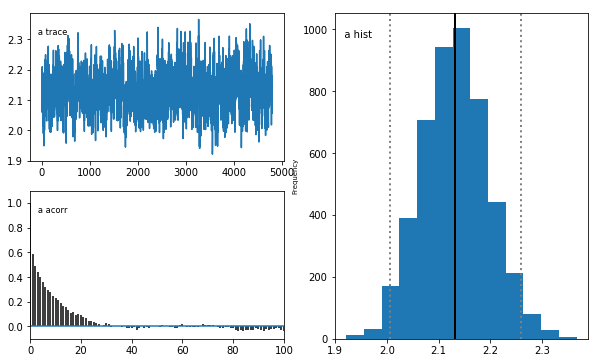

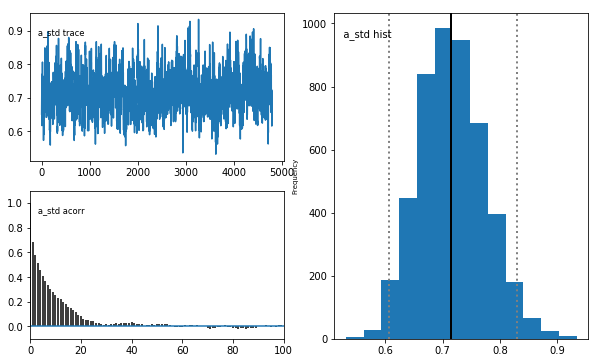

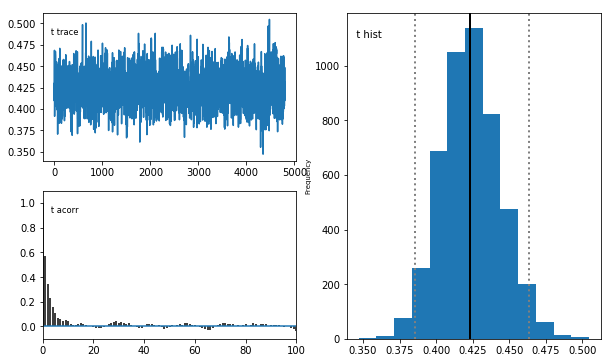

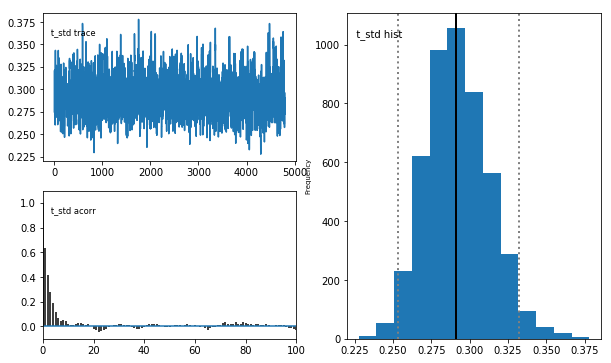

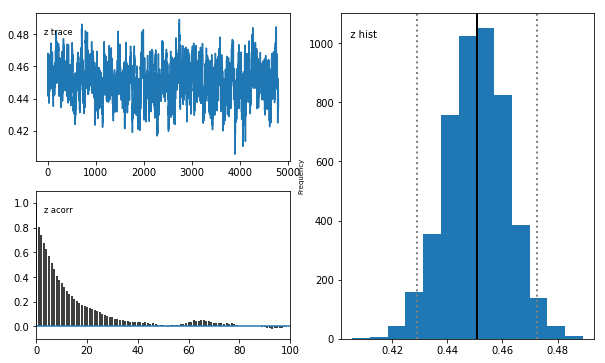

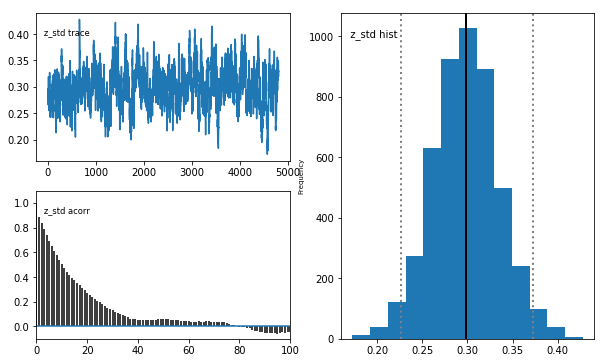

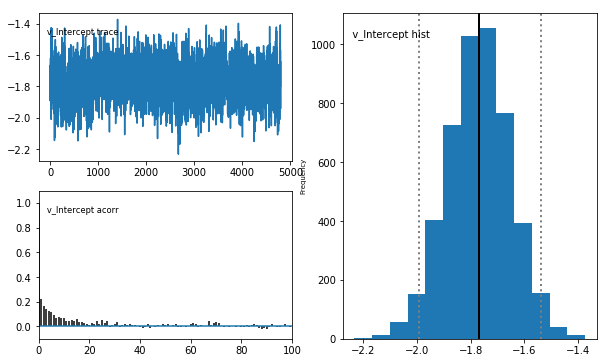

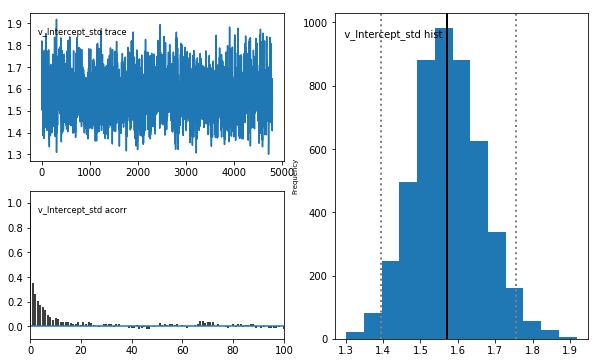

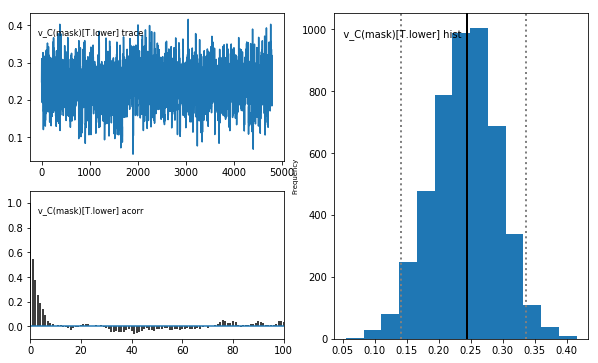

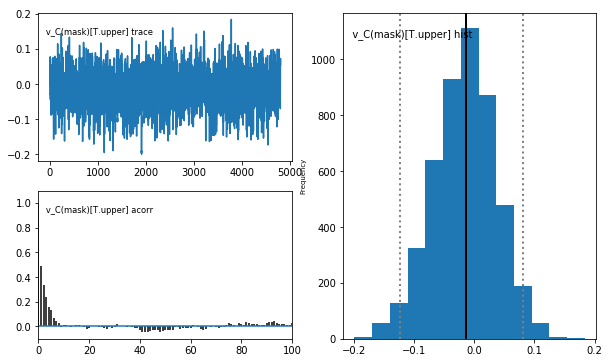

In [8]:
# run model
m_ar.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ar.print_stats()
m_ar.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std      2.5q        25q  \
a                                   2.13148  0.0654868   2.00617    2.08749   
a_std                               0.71623  0.0575033  0.609362   0.675726   
a_subj.02hcv424u29nd5w              2.85851   0.346095   2.25631    2.61385   
a_subj.02k2uwlhgxnumn9              2.33439   0.551878   1.43783    1.93873   
a_subj.03g7h2hzq4o3g26              2.85968    0.43141   2.15139    2.54572   
a_subj.0nmr75cysk1ae0e               1.8053   0.219225   1.44532    1.64789   
a_subj.0t8qp67pqkw36cb              1.97892    0.44143   1.29692    1.65869   
a_subj.0vfpn4uf3t031qu              2.18098   0.553056   1.29857    1.78871   
a_subj.11dsfdtym1yy5mx              2.20485   0.443037   1.49225    1.88906   
a_subj.1d3dadyu4ekqb4q              1.37985   0.162262   1.09994    1.26708   
a_subj.1mt2emp4645cbl1              1.82704   0.242087   1.43087    1.65661   
a_subj.1rst24mbtgy9rc8              2.64987   0.5432

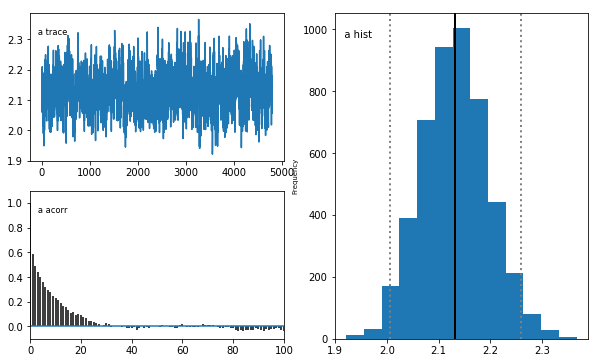

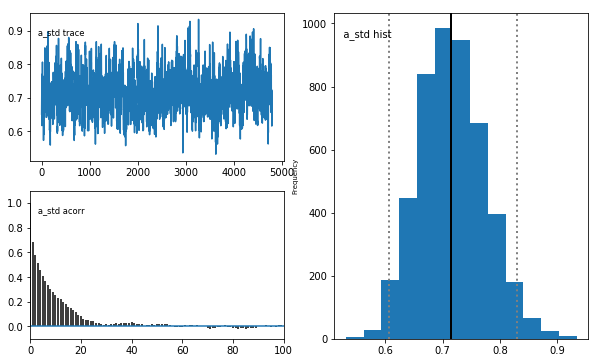

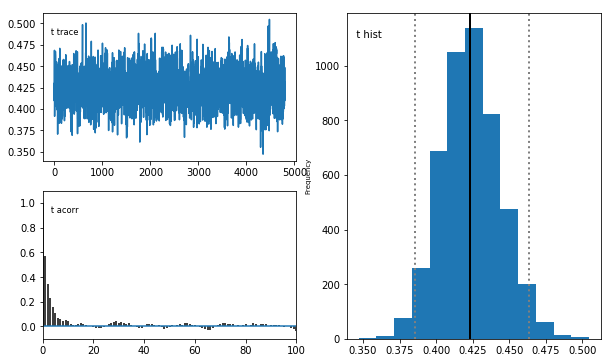

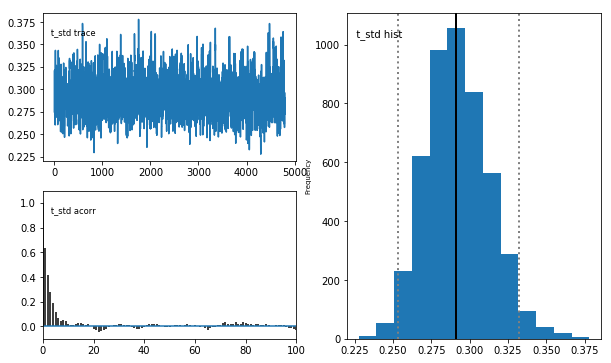

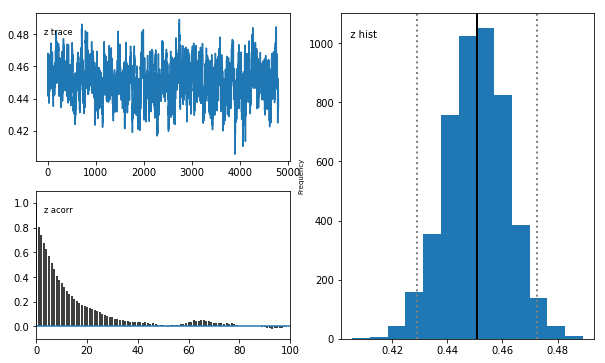

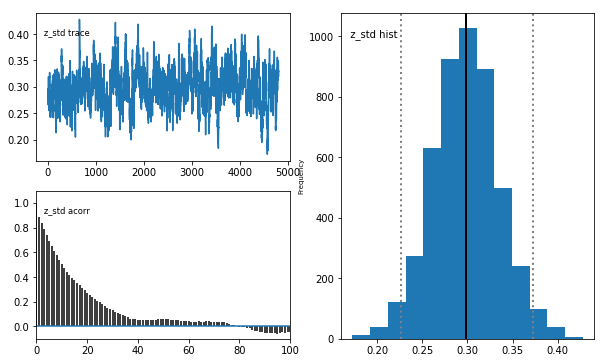

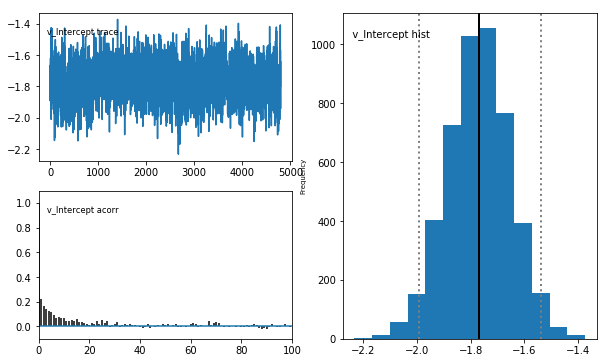

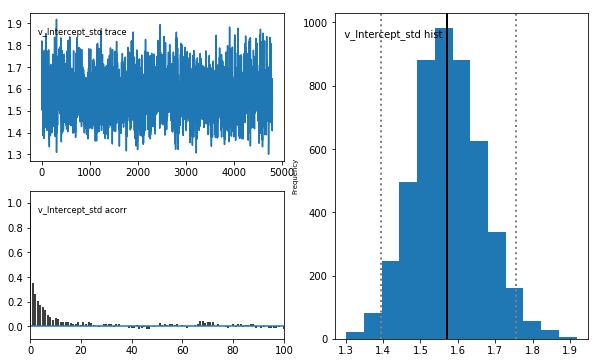

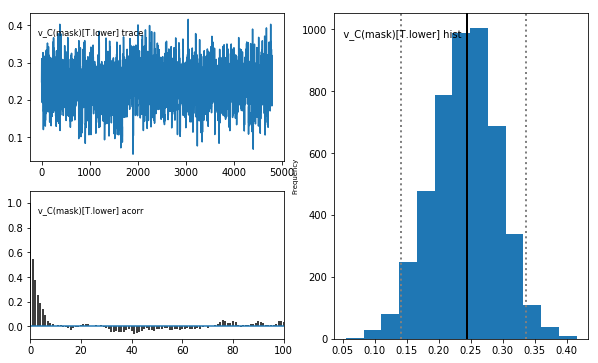

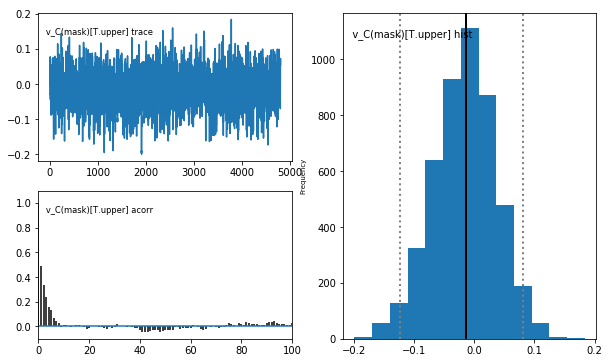

In [9]:
# save model stats
ar_stats = m_ar.gen_stats()
print(ar_stats)
ar_stats.to_csv('_maskFalsePositives/ar_5000/faceMask_hddm_drift_maskFalsePositives_ar_5000.csv', index=True)

# save model posterior plots
m_ar.plot_posteriors(path='_maskFalsePositives/ar_5000/_posteriors', save=True)

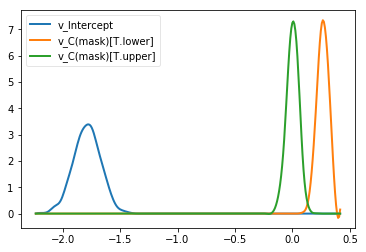

In [10]:
# plot model posteriors by mask
ar_v_none, ar_v_lower, ar_v_upper = m_ar.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ar_v_none, ar_v_lower, ar_v_upper])
plt.savefig('_maskFalsePositives/ar_5000/faceMask_hddm_drift_maskFalsePositives_ar_5000_v_mask.pdf')

In [12]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ar_v_none > 0) = ", (ar_v_none.trace() > 0).mean())
print("P(ar_v_lower < 0) = ", (ar_v_lower.trace() < 0).mean())
print("P(ar_v_upper > 0) = ", (ar_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ar_v_lower < ar_v_upper) = ", (ar_v_lower.trace() < ar_v_upper.trace()).mean())

P(ar_v_none > 0) =  0.0
P(ar_v_lower < 0) =  0.0
P(ar_v_upper > 0) =  0.388541666667
P(ar_v_lower < ar_v_upper) =  0.0
